# Section 01: Exploratory Analysis

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
filename = "/home/andres/Downloads/marketing_analytics_project/marketing_data.csv"

In [4]:
df = pd.read_csv(filename)

In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


### Are there any null values?

In [6]:
# Identify missing values
missing_data = df.isnull()

# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

ID
False    2240
Name: ID, dtype: int64

Year_Birth
False    2240
Name: Year_Birth, dtype: int64

Education
False    2240
Name: Education, dtype: int64

Marital_Status
False    2240
Name: Marital_Status, dtype: int64

 Income 
False    2216
True       24
Name:  Income , dtype: int64

Kidhome
False    2240
Name: Kidhome, dtype: int64

Teenhome
False    2240
Name: Teenhome, dtype: int64

Dt_Customer
False    2240
Name: Dt_Customer, dtype: int64

Recency
False    2240
Name: Recency, dtype: int64

MntWines
False    2240
Name: MntWines, dtype: int64

MntFruits
False    2240
Name: MntFruits, dtype: int64

MntMeatProducts
False    2240
Name: MntMeatProducts, dtype: int64

MntFishProducts
False    2240
Name: MntFishProducts, dtype: int64

MntSweetProducts
False    2240
Name: MntSweetProducts, dtype: int64

MntGoldProds
False    2240
Name: MntGoldProds, dtype: int64

NumDealsPurchases
False    2240
Name: NumDealsPurchases, dtype: int64

NumWebPurchases
False    2240
Name: NumWebPurchases, dtype

We can see that the field "Income" has 24 missing values.

### Are there any outliers?

In [7]:
# calculate the quartiles
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# calculate the number of outliers for every field
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

 Income                  0
AcceptedCmp1           144
AcceptedCmp2            30
AcceptedCmp3           163
AcceptedCmp4           167
AcceptedCmp5           163
Complain                21
Country                  0
Dt_Customer              0
Education                0
ID                       0
Kidhome                  0
Marital_Status           0
MntFishProducts        223
MntFruits              227
MntGoldProds           207
MntMeatProducts        175
MntSweetProducts       248
MntWines                35
NumCatalogPurchases     23
NumDealsPurchases       86
NumStorePurchases        0
NumWebPurchases          4
NumWebVisitsMonth        8
Recency                  0
Response               334
Teenhome                 0
Year_Birth               3
dtype: int64

We can see that several fields have up to 200 outliers, while some others don't have outliers at all.<br>
We can visualize those outliers using box plots, for example for the fields "Year_Birth" and "Complain":

<AxesSubplot:>

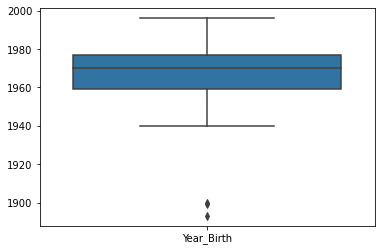

In [8]:
sns.boxplot(data = df[['Year_Birth']])

# an alternative
#df[['Year_Birth']].plot(kind='box')

<AxesSubplot:>

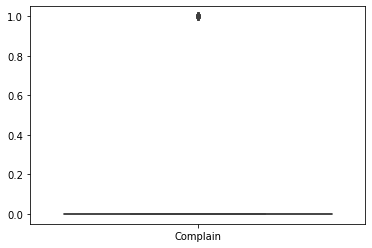

In [9]:
sns.boxplot(data = df[['Complain']])

# an alternative
#df[['Complain']].plot(kind='box')

### Handling missing values and outliers

Missing values: por ahora los voy a dejar, y más adelante veo si los tiro

Outliers: idem. Hasta no saber qué análisis voy a hacer, no puedo saber si me van a producir un sesgo

### Are there any variables that warrant transformations?

No sé de qué habla

### Are there any useful variables that you can engineer with the given data?

Volver sobre esto más adelante. Ahora todavía ni conozco el dataset.

### Do you notice any patterns or anomalies in the data? Can you plot them?

In [10]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Por ahora no me doy cuenta de nada, pero más adelante puedo volver sobre esto